In [1]:
# Import dependencies
from citipy import citipy
import pandas as pd
import numpy as np
import json 
import requests
import time

import matplotlib.pyplot as plt
from datetime import datetime
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=071a9b7f20d73f3590e397c7e43f09b7


In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 2 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | vilyuysk
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | kaeo
Processing Record 8 of Set 1 | pendleton
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | sao joao da barra
Processing Record 13 of Set 1 | abu samrah
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | kedrovyy
Processing Record 19 of Set 1 | katsuura
Processing Record 20 of Set 1 | atuona
Processing Rec

Processing Record 39 of Set 4 | taga
Processing Record 40 of Set 4 | rocha
Processing Record 41 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 42 of Set 4 | talnakh
Processing Record 43 of Set 4 | doha
Processing Record 44 of Set 4 | gornopravdinsk
Processing Record 45 of Set 4 | biharamulo
Processing Record 46 of Set 4 | paamiut
Processing Record 47 of Set 4 | safwah
City not found. Skipping...
Processing Record 48 of Set 4 | san cristobal
Processing Record 49 of Set 4 | vazante
Processing Record 50 of Set 4 | saskylakh
Processing Record 1 of Set 5 | ambon
Processing Record 2 of Set 5 | kodiak
Processing Record 3 of Set 5 | tinskoy
Processing Record 4 of Set 5 | thompson
Processing Record 5 of Set 5 | qujing
Processing Record 6 of Set 5 | bathsheba
Processing Record 7 of Set 5 | longyearbyen
Processing Record 8 of Set 5 | ventspils
Processing Record 9 of Set 5 | guane
Processing Record 10 of Set 5 | naze
Processing Record 11 of Set 5 | kajaani
Processing Record 1

Processing Record 30 of Set 8 | tevaitoa
Processing Record 31 of Set 8 | george town
Processing Record 32 of Set 8 | oistins
Processing Record 33 of Set 8 | sturgis
Processing Record 34 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 35 of Set 8 | olafsvik
Processing Record 36 of Set 8 | san roque
Processing Record 37 of Set 8 | cairns
Processing Record 38 of Set 8 | salinopolis
Processing Record 39 of Set 8 | ardakan
Processing Record 40 of Set 8 | kjollefjord
Processing Record 41 of Set 8 | udachnyy
Processing Record 42 of Set 8 | sao filipe
Processing Record 43 of Set 8 | toronto
Processing Record 44 of Set 8 | whitehorse
Processing Record 45 of Set 8 | vedasandur
Processing Record 46 of Set 8 | oranjemund
Processing Record 47 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 48 of Set 8 | odda
Processing Record 49 of Set 8 | antofagasta
Processing Record 50 of Set 8 | guerrero negro
Processing Record 1 of Set 9 | opunake
Processing Record 2 of Set 9 | labuhan

City not found. Skipping...
Processing Record 20 of Set 12 | griffith
Processing Record 21 of Set 12 | teguldet
Processing Record 22 of Set 12 | xuzhou
Processing Record 23 of Set 12 | bajil
Processing Record 24 of Set 12 | torrington
Processing Record 25 of Set 12 | antalya
Processing Record 26 of Set 12 | ales
Processing Record 27 of Set 12 | skjervoy
Processing Record 28 of Set 12 | moron
Processing Record 29 of Set 12 | lancaster
Processing Record 30 of Set 12 | jumla
Processing Record 31 of Set 12 | liverpool
Processing Record 32 of Set 12 | vandra
Processing Record 33 of Set 12 | adilcevaz
Processing Record 34 of Set 12 | inuvik
Processing Record 35 of Set 12 | alexandria
Processing Record 36 of Set 12 | faya
Processing Record 37 of Set 12 | perry
Processing Record 38 of Set 12 | khujand
Processing Record 39 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 40 of Set 12 | puerto escondido
Processing Record 41 of Set 12 | gayny
Processing Record 42 of Set 12 

In [7]:
#convert the arry of dictonaries to a pandas Dataframe.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kurilsk,50.6789,156.1250,25.23,82,27,6.49,RU,2022-01-07 22:19:10
1,Vilyuysk,63.7553,121.6247,-21.66,94,97,2.06,RU,2022-01-07 22:19:11
2,Bredasdorp,-34.5322,20.0403,69.28,88,99,17.27,ZA,2022-01-07 22:19:11
3,Kaeo,-35.1000,173.7833,72.63,65,46,6.89,NZ,2022-01-07 22:19:11
4,Pendleton,45.6721,-118.7886,48.09,60,40,10.00,US,2022-01-07 22:18:35
5,Bluff,-46.6000,168.3333,61.81,76,95,3.62,NZ,2022-01-07 22:19:12
6,Vaini,-21.2000,-175.2000,80.76,89,75,9.22,TO,2022-01-07 22:19:12
7,Hobart,-42.8794,147.3294,61.05,88,75,10.36,AU,2022-01-07 22:19:12
8,Sao Joao Da Barra,-21.6403,-41.0511,73.06,95,100,5.35,BR,2022-01-07 22:19:13
9,Abu Samrah,35.3029,37.1841,50.16,68,0,2.93,SY,2022-01-07 22:19:13


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevent fields from the DataFrame fro plotting.
lats = city_data_df["Lat"]
max_temps =city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

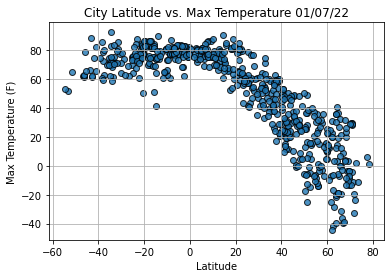

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

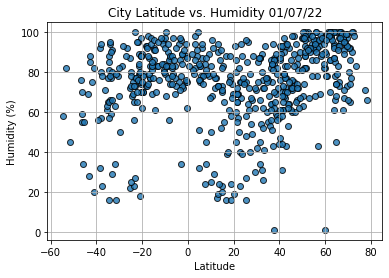

In [11]:
# Import time module
import time

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

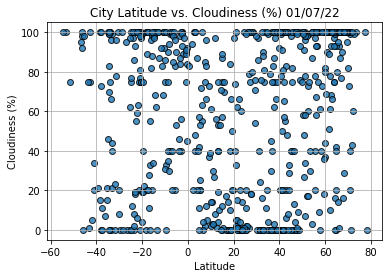

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

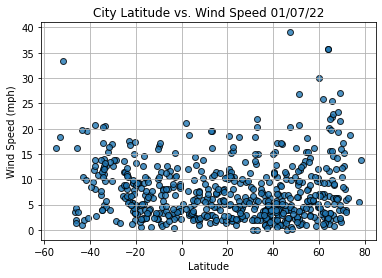

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [14]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
index13 = city_data_df.loc[13]
index13

City                  East London
Lat                      -33.0153
Lng                       27.9116
Max Temp                    71.44
Humidity                       91
Cloudiness                     99
Wind Speed                  12.64
Country                        ZA
Date          2022-01-07 22:19:14
Name: 13, dtype: object

In [16]:
city_data_df.loc[city_data_df["Lat"] >= 0]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kurilsk,50.6789,156.1250,25.23,82,27,6.49,RU,2022-01-07 22:19:10
1,Vilyuysk,63.7553,121.6247,-21.66,94,97,2.06,RU,2022-01-07 22:19:11
4,Pendleton,45.6721,-118.7886,48.09,60,40,10.00,US,2022-01-07 22:18:35
9,Abu Samrah,35.3029,37.1841,50.16,68,0,2.93,SY,2022-01-07 22:19:13
10,Nikolskoye,59.7035,30.7861,9.81,98,82,4.61,RU,2022-01-07 22:19:13
...,...,...,...,...,...,...,...,...,...
583,Tudora,47.5167,26.6333,28.31,72,1,6.29,RO,2022-01-07 22:34:34
584,Gravdal,68.1214,13.5031,26.10,71,29,6.06,NO,2022-01-07 22:34:34
587,Galbshtadt,53.2264,78.9845,15.96,92,30,12.84,RU,2022-01-07 22:34:35
589,Sibolga,1.7427,98.7792,75.09,89,94,4.12,ID,2022-01-07 22:34:36


In [17]:
city_data_df.loc[city_data_df["Lat"] >= 0].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kurilsk,50.6789,156.1250,25.23,82,27,6.49,RU,2022-01-07 22:19:10
1,Vilyuysk,63.7553,121.6247,-21.66,94,97,2.06,RU,2022-01-07 22:19:11
4,Pendleton,45.6721,-118.7886,48.09,60,40,10.00,US,2022-01-07 22:18:35
9,Abu Samrah,35.3029,37.1841,50.16,68,0,2.93,SY,2022-01-07 22:19:13
10,Nikolskoye,59.7035,30.7861,9.81,98,82,4.61,RU,2022-01-07 22:19:13


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

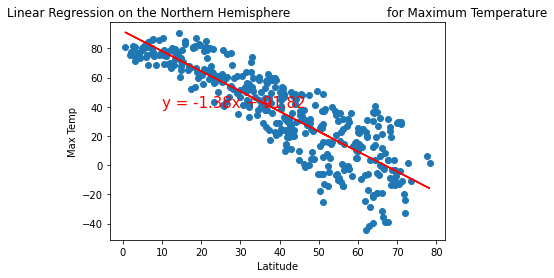

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

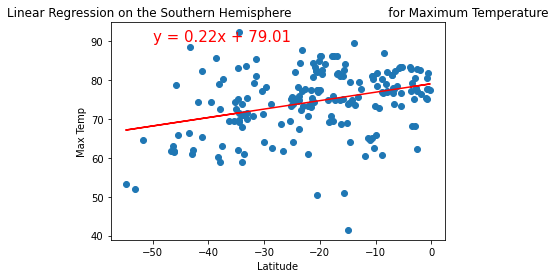

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


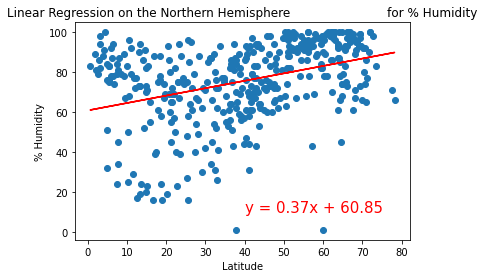

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

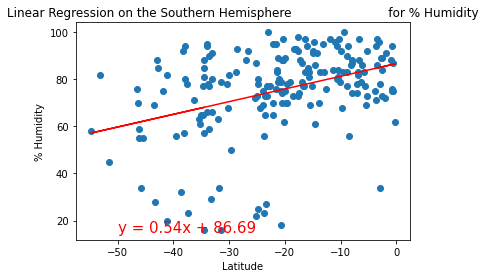

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

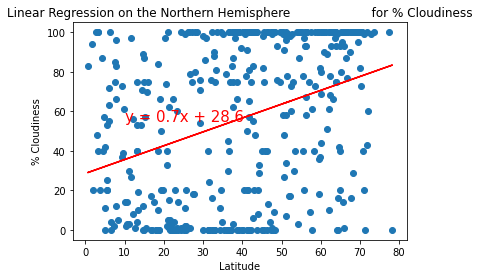

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

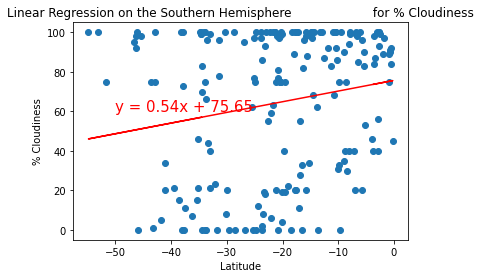

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Southern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(-50,60))

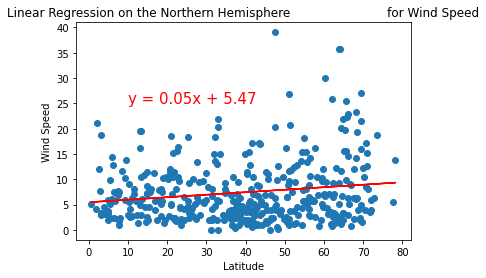

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,25))

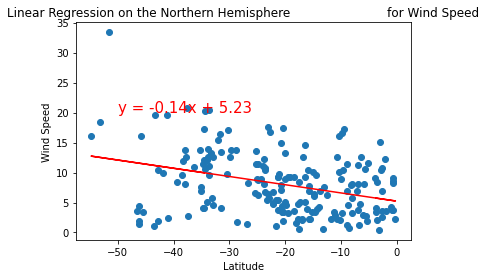

In [26]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))